In [36]:
from imutils import paths #imutils includes opencv functions
import pickle
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

In [21]:
def show(im):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.axis("off")
    plt.imshow(im)
    plt.show()

In [22]:
in_file="./test_set/crowd.jpg"

In [23]:
image = cv2.imread(in_file)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

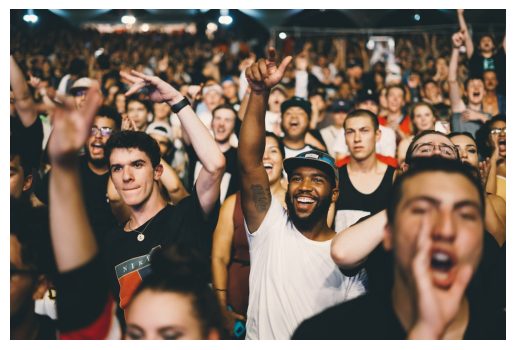

In [24]:
show(image)

### Teaser Params:
* n_clusters : 6
* min_area : 191
* poly_ep : 7
* Thresh_factor : 6
* Thresh Area = 7490.66

In [27]:
thresh = 7490.66
process_color = (0, 255, 0)
ignore_color = (255, 0, 0)

In [28]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces
faces  = face_cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h),process_color if w*h <= thresh else ignore_color, 2)

In [29]:
faces

array([[211, 176,  27,  27],
       [947,  54,  27,  27],
       [856, 101,  28,  28],
       [873, 137,  32,  32],
       [951, 129,  36,  36],
       [229, 185,  50,  50],
       [756, 157,  44,  44],
       [808, 195,  51,  51],
       [518, 158,  39,  39],
       [544, 190,  60,  60],
       [159, 220,  52,  52],
       [401, 201,  56,  56],
       [664, 218,  74,  74],
       [185, 276, 106, 106],
       [547, 305,  99,  99],
       [768, 323, 212, 212],
       [898, 226,  78,  78]], dtype=int32)

In [30]:
crop_img = image[y:y+h, x:x+w]

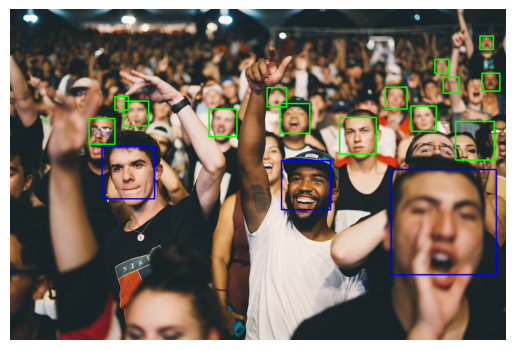

In [31]:
show(image)

In [33]:
cv2.imwrite("./outs/labelled_input.png", image)

True

In [34]:
def merge_images(file1, file2):
    """Merge two images into one, displayed side by side
    :param file1: path to first image file
    :param file2: path to second image file
    :return: the merged Image object
    """
    image1 = Image.open(file1)
    image2 = Image.open(file2)

    (width1, height1) = image1.size
    (width2, height2) = image2.size

    result_width = width1 + width2
    result_height = max(height1, height2)

    result = Image.new('RGB', (result_width, result_height))
    result.paste(im=image1, box=(0, 0))
    result.paste(im=image2, box=(width1, 0))
    return result

In [37]:
comp = merge_images("./outs/labelled_input.png","./outs/teaser_image.png")

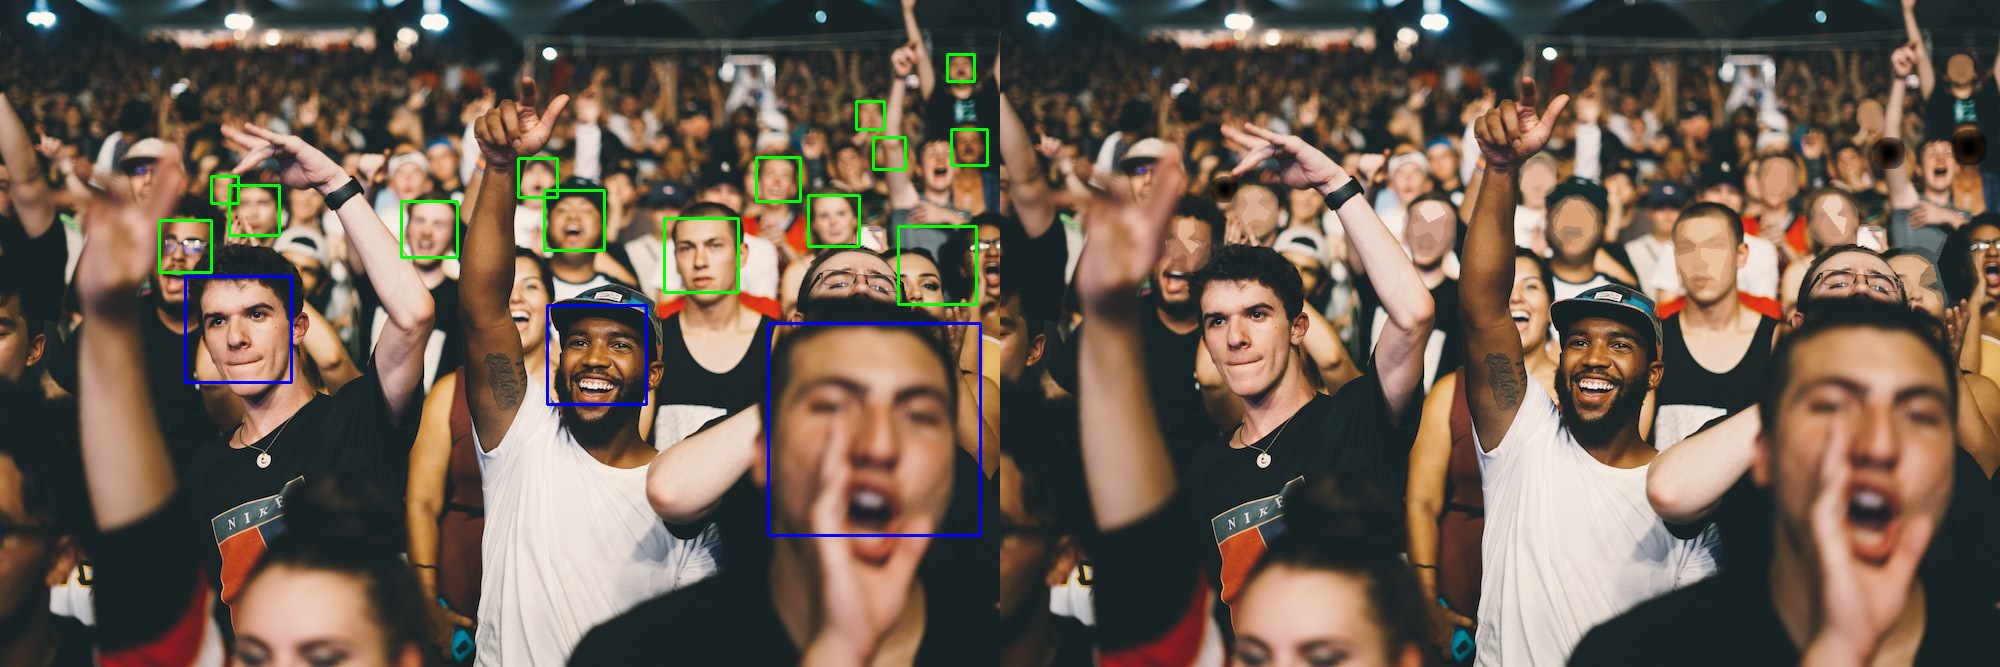

In [39]:
comp